In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('BeijingPM20100101_20151231.csv')

In [2]:
df = df.drop(["PM_Dongsi", 'PM_Dongsihuan','PM_Nongzhanguan'], axis=1)
df.head()

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [3]:
df = df.dropna(axis=0)

In [4]:
df.cbwd.unique()

array(['cv', 'SE', 'NW', 'NE'], dtype=object)

In [5]:
df["cbwd"] = df["cbwd"].map({"NW":1, "cv":2, "NE" : 3 , "SE":4})

In [6]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [7]:
df['dow'] = df['date'].dt.dayofweek

In [8]:
df = df.set_index('date')
df = df.drop(['No'], axis=1)

In [9]:
df['season'] = df['season'].astype('category')
df["cbwd"] = df["cbwd"].astype('category')

In [10]:
# df['diff_hum'] = df['HUMI'].diff().shift(-1)
# df['diff_temp'] = df['TEMP'].diff().shift(-1)
# df['diff_dew'] = df['DEWP'].diff().shift(-1)
# df['diff_pm'] = df['PM_US Post'].diff()


In [11]:
df.head(100)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,dow
date,,,,,,,,,,,,,,,
2010-01-01 23:00:00,2010,1,1,23,4,129.0,-17.0,41.0,1020.0,-5.0,2,0.89,0.0,0.0,4
2010-01-02 00:00:00,2010,1,2,0,4,148.0,-16.0,38.0,1020.0,-4.0,4,1.79,0.0,0.0,5
2010-01-02 01:00:00,2010,1,2,1,4,159.0,-15.0,42.0,1020.0,-4.0,4,2.68,0.0,0.0,5
2010-01-02 02:00:00,2010,1,2,2,4,181.0,-11.0,63.5,1021.0,-5.0,4,3.57,0.0,0.0,5
2010-01-02 03:00:00,2010,1,2,3,4,138.0,-7.0,85.0,1022.0,-5.0,4,5.36,0.0,0.0,5
2010-01-02 04:00:00,2010,1,2,4,4,109.0,-7.0,85.0,1022.0,-5.0,4,6.25,0.0,0.0,5
2010-01-02 05:00:00,2010,1,2,5,4,105.0,-7.0,92.0,1022.0,-6.0,4,7.14,0.0,0.0,5
2010-01-02 06:00:00,2010,1,2,6,4,124.0,-7.0,92.0,1023.0,-6.0,4,8.93,0.0,0.0,5
2010-01-02 07:00:00,2010,1,2,7,4,120.0,-7.0,85.0,1024.0,-5.0,4,10.72,0.0,0.0,5


In [12]:
df = df.drop(['month','day','hour', 'year'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0F16C5278>,
      dtype=object)

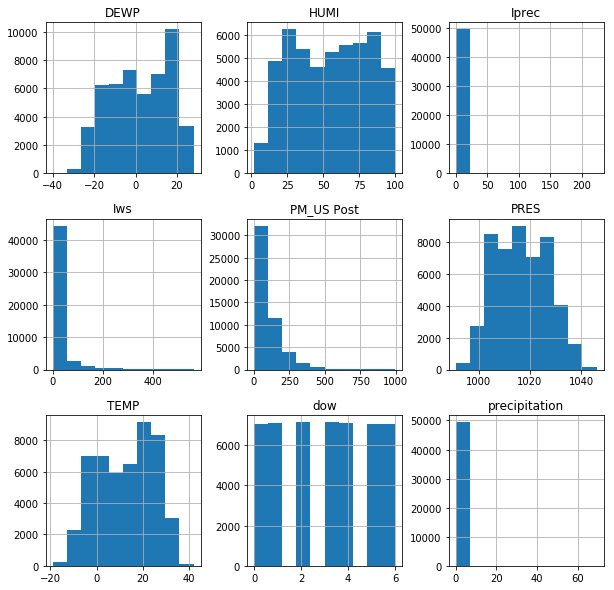

In [13]:
# df['TEMP'] = df['TEMP'] + 19
# df['DEWP'] = df['DEWP'] + 40

# df['Log_Iws'] = np.log((1+ df['Iws']))
# # df['Log_precipitation'] = np.log((1+ df['precipitation']))
# df['Log_HUMI'] = np.log((1+ df['HUMI']))
# df['Log_TEMP'] = np.log((1+ df['TEMP']))
# df['Log_DEWP'] = np.log((1+ df['DEWP']))

# df['TEMP'] = df['TEMP'] - 19
# df['DEWP'] = df['DEWP'] - 40

df.hist(figsize=(10,10))

In [14]:
# df = df.drop(['Iws','Iprec'], axis=1)

In [15]:
df_mean_day = df.resample('1h').mean().interpolate(method='linear')
df_mean_day.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,dow
date,,,,,,,,,
2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,4.0
2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,5.0
2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,5.0
2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,5.0
2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,5.0


In [16]:
df_mean_day['season'] = df['season']
df_mean_day['cbwd'] = df['cbwd']
df_mean_day.fillna(method='bfill', inplace=True)
df_mean_day.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,dow,season,cbwd
date,,,,,,,,,,,
2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,4.0,4,2
2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,5.0,4,4
2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,5.0,4,4
2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,5.0,4,4
2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,5.0,4,4


In [17]:
# # df_train = df_mean_day.loc['2010-01-01':'2013-12-31']
# df_train = df_mean_day.loc['2013-10-01':'2014-04-30']
# df_train = df_train.loc[df_train['season'] == 4]
# df_train.head()

In [18]:
# df_test = df_mean_day.loc['2014-10-01':'2015-04-30']
# # df_test = df_mean_day.loc['2012-01-01':'2012-12-31']
# df_test = df_test.loc[df_test['season'] == 4]
# df_test.head()

In [19]:
# X_train = df_train.drop(['diff_pm','PM_US Post'], axis=1)
# y_train = df_train['diff_pm']

In [20]:
# X_test = df_test.drop(['diff_pm','PM_US Post'], axis=1)
# # X_test['diff_pm'] = X_train['diff_pm'].mean()
# y_test = df_test['diff_pm']

In [21]:
df10 = df_mean_day.loc['2010-01-01':'2012-12-31']
df10.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,dow,season,cbwd
date,,,,,,,,,,,
2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,0.89,0.0,0.0,4.0,4,2
2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,1.79,0.0,0.0,5.0,4,4
2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,2.68,0.0,0.0,5.0,4,4
2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,3.57,0.0,0.0,5.0,4,4
2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,5.36,0.0,0.0,5.0,4,4


In [47]:
# df_mean = df_mean_day.loc['2013-01-01':'2013-12-31']
df_mean = df_mean_day.loc['2010-10-01':'2014-04-30']
df_mean = df_mean.loc[df_mean['season'] == 4]
df_mean.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,dow,season,cbwd
date,,,,,,,,,,,
2010-12-01 00:00:00,256.0,0.0,93.0,1017.0,1.0,0.89,0.0,0.0,2.0,4,2
2010-12-01 01:00:00,252.0,0.0,93.0,1016.0,1.0,1.78,0.0,0.0,2.0,4,2
2010-12-01 02:00:00,248.0,0.0,93.0,1016.0,1.0,2.67,0.0,0.0,2.0,4,2
2010-12-01 03:00:00,239.0,-1.0,86.0,1016.0,1.0,3.56,0.0,0.0,2.0,4,2
2010-12-01 04:00:00,238.0,-1.0,86.0,1015.0,1.0,4.01,0.0,0.0,2.0,4,2


In [23]:
# # X = df.drop(['PM_US Post', 'month','day','hour'], axis=1)
# X = df_mean.drop(['diff_pm'], axis=1)
# y = df_mean['diff_pm']

In [24]:
# from sklearn.model_selection import train_test_split
# # split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 1/8)

In [25]:
# asdr = X_train['PM_US Post']
# asdt = X_test['PM_US Post']
# X_train = X_train.drop(['PM_US Post'], axis=1)
# X_test = X_test.drop(['PM_US Post'], axis=1)

In [41]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [48]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries
        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today
        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today
        test_size: float
            size of the test dataset after train/test split as percentage of dataset
        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features

    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(
            code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(
            code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # drop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test =\
    timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test
  
  
X_train, X_test, y_train, y_test =\
prepareData(df_mean['PM_US Post'], lag_start=1, lag_end=8, test_size=1/4, target_encoding=True)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(20,10))
    plt.plot(prediction, "r", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    display(math.sqrt(mean_squared_error(prediction, y_test)))
    display(mean_absolute_error(prediction, y_test))
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

27.713316072000413

15.714965629318922

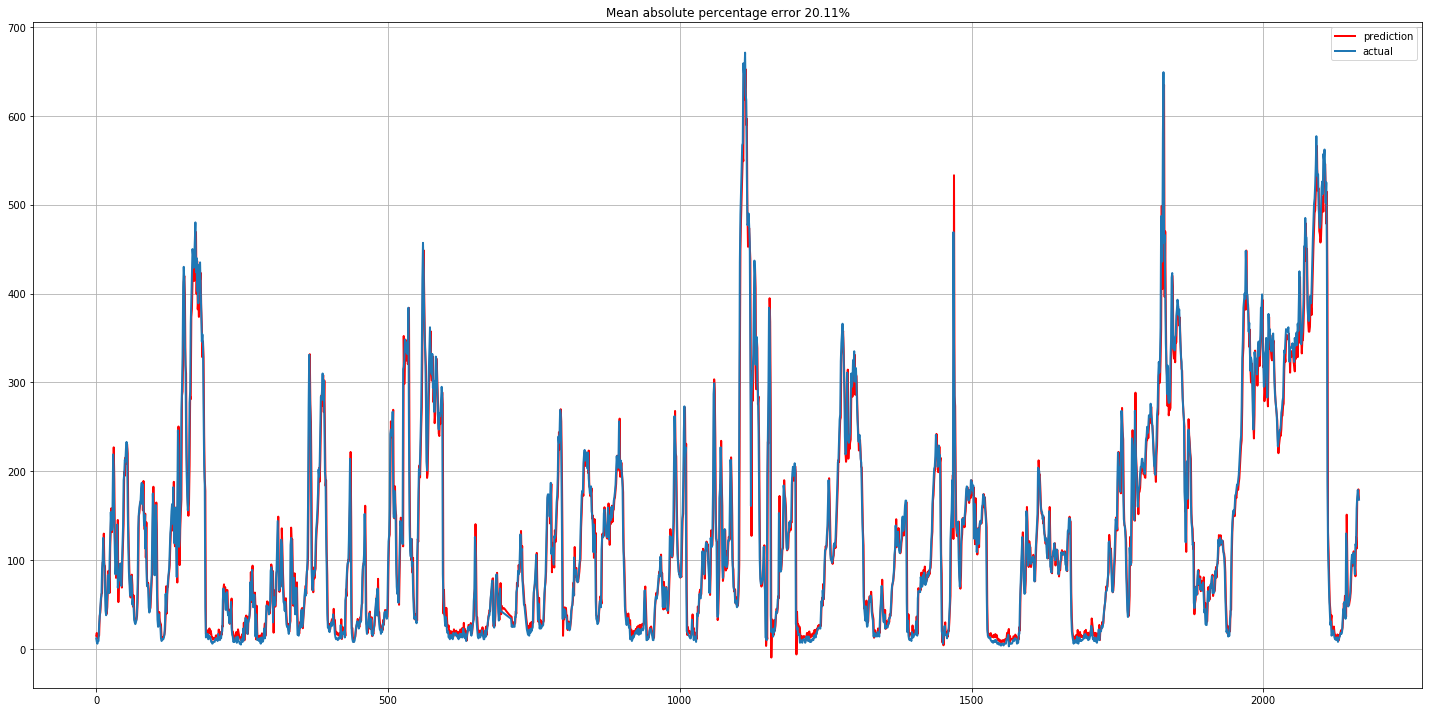

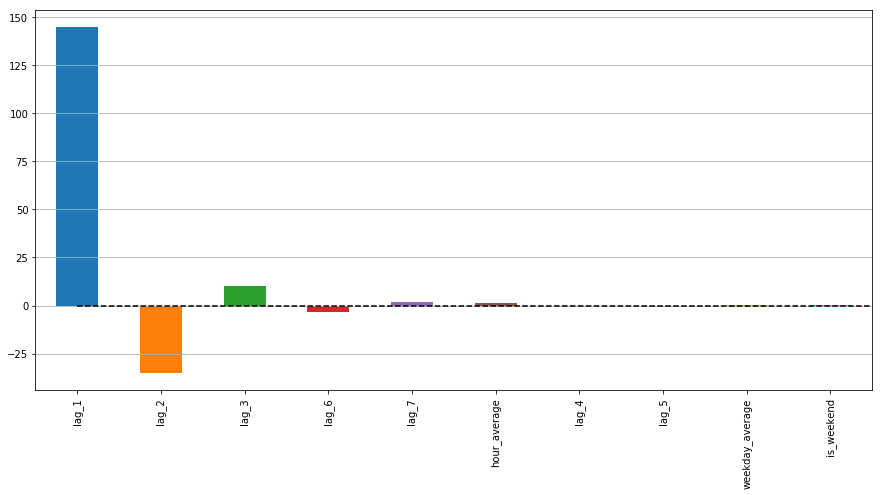

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

tscv = TimeSeriesSplit(n_splits=5)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled)
plotCoefficients(lr)

32.11092349762801

18.69514921126835

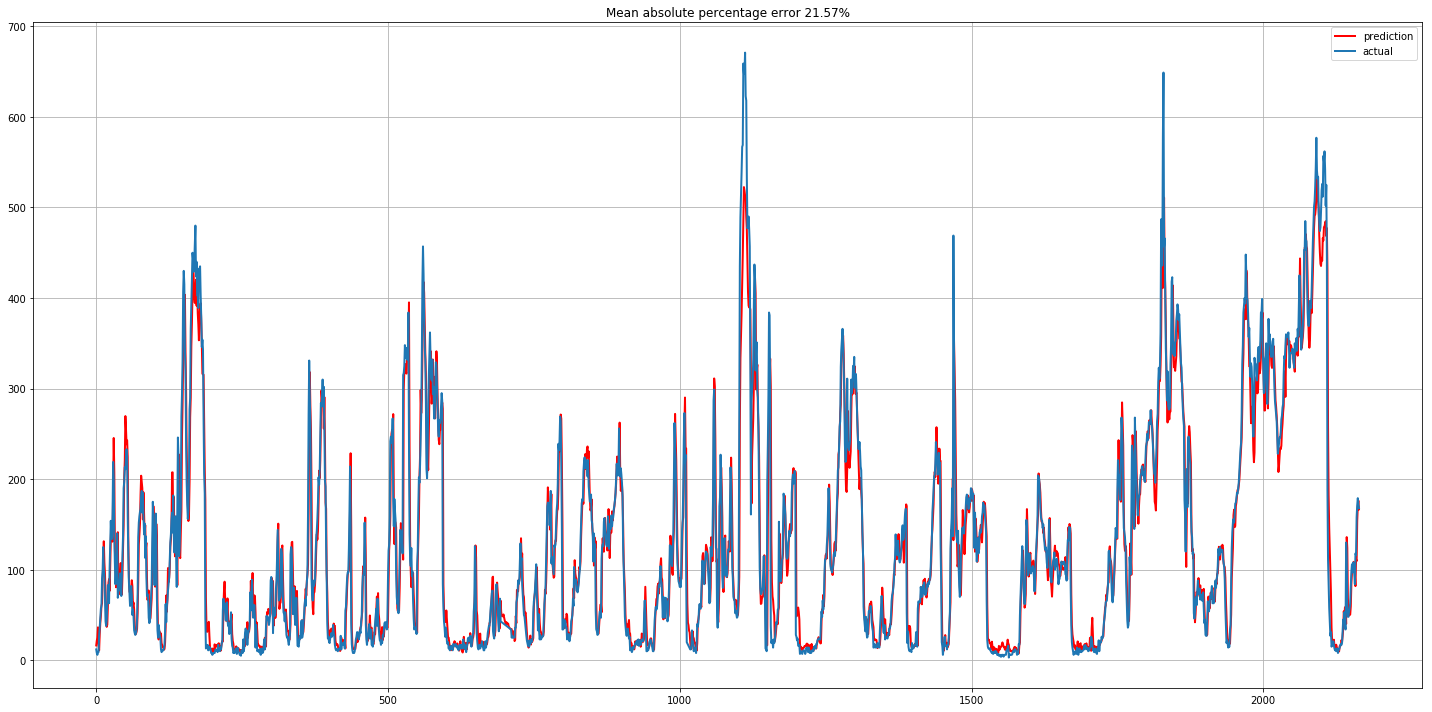

In [53]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF, RationalQuadratic

kernel = RationalQuadratic(alpha=5)
# kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=True,
                                random_state=42)
gp.fit(X_train_scaled, y_train)

plotModelResults(gp, X_train=X_train_scaled, X_test=X_test_scaled)